# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np
import os
import random
import csv
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# Fill this in based on where you saved the training and testing data
training_file = './data/train.p'
validation_file='./data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [47]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.

# Get all Labels
all_labels = []
#Select workbook
with open('signnames.csv', 'r') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    # exclude 1st row 
    for row in readCSV:
        all_labels += [row[1]]
n_classes = len(all_labels)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 104397
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

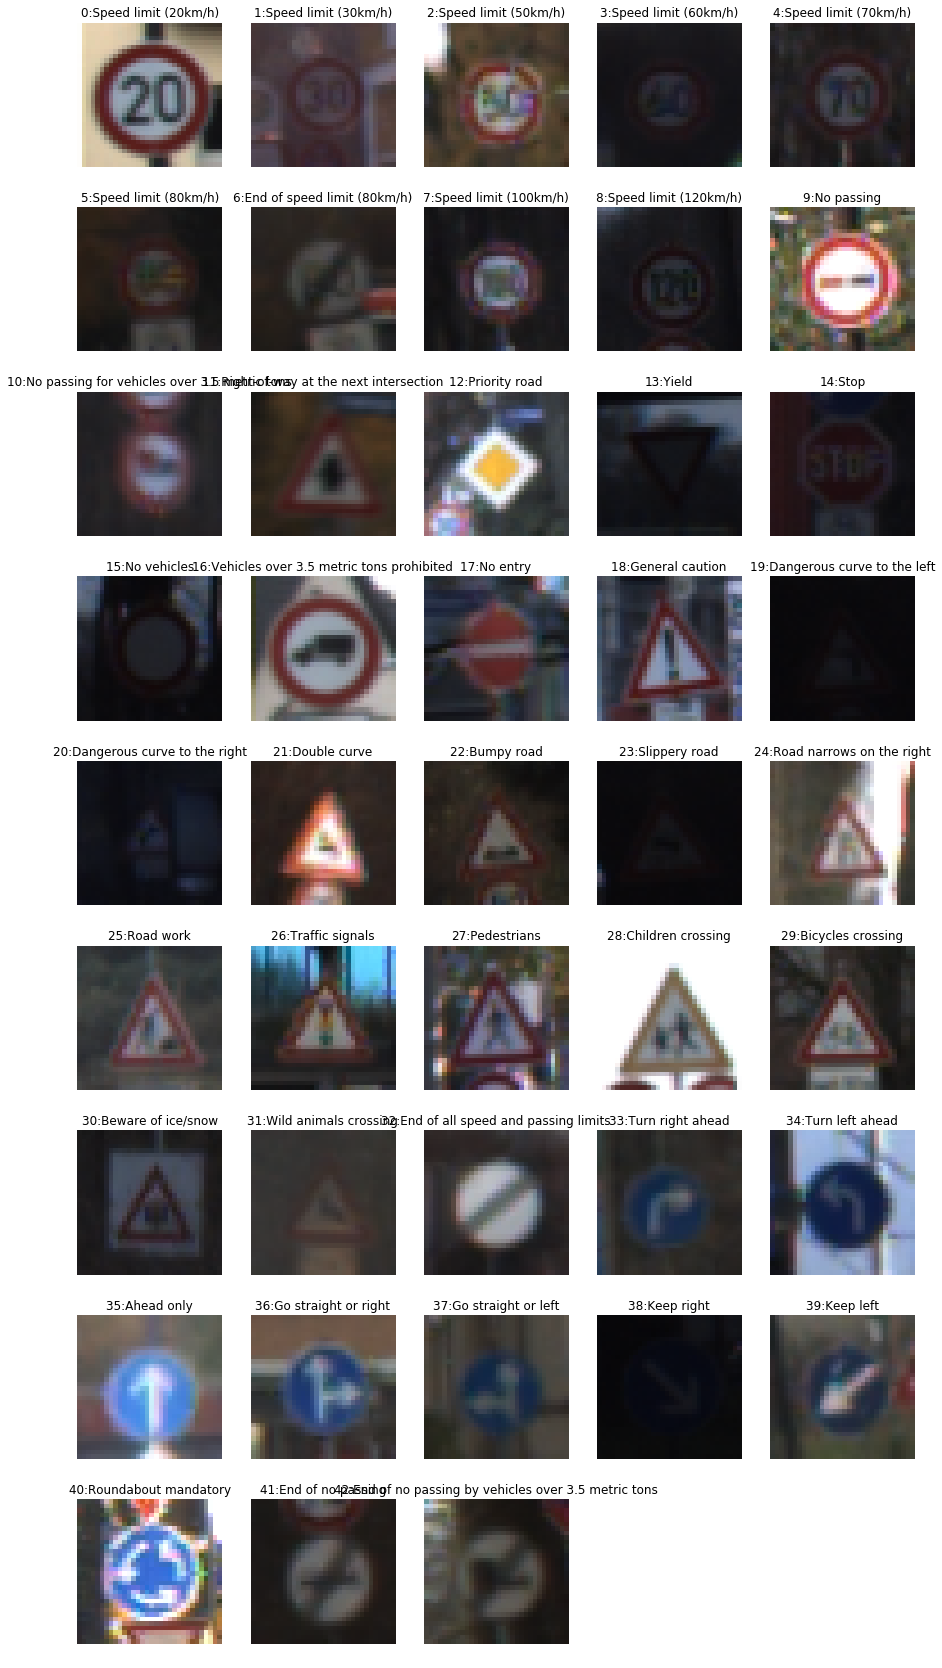

In [4]:
### Show images with it label.
num_of_samples=[]
plt.figure(figsize=(15, 30))
for i in range(0, n_classes):
    plt.subplot(9, 5, i+1)
    x_selected = x_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(str(i) + ":" + all_labels[i])
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()


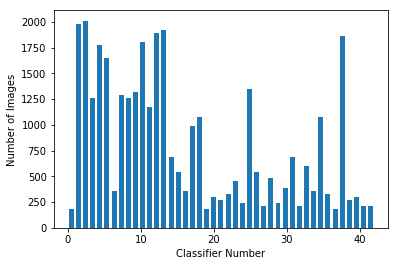

In [5]:
# histogram of Test-Data frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.ylabel('Number of Images')
plt.xlabel('Classifier Number')
plt.show()

---

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

The image data has been converted to grayscale and then normalized to improve the training/validation accuracy/performance.

Normalization followed `(pixel - 128)/ 128` formula.

In [6]:
# Generate Images for Learning
class ImageDataGenerator():
    
    # Init
    def __init__(self):
        pass
    
    @staticmethod
    def grayscale(images):
        # convert images to grayscale
        image_list = []
        for img in images:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            image_list.append(gray)
        image_list = np.array(image_list)
        # convert (32,32) images into (32,32,1)
        image_list = np.reshape(image_list, (-1,32,32,1))
        return np.array(image_list)

    @staticmethod
    def normalize(images):
        #output = images.astype(np.float32) * (1. / 255) - 0.5
        output = (images - 128)/128
        return output
    
    # random translate
    @staticmethod
    def random_translate(images, labels, trans_range):
        # Check that Images/Labels have the same shape
        if(images.shape[0] != labels.shape[0]):
            raise Exception("Batch size Error.")
        
        # get width - height of 1st image
        img_width = images[0].shape[0]
        img_height = images[0].shape[1]
        
        # Convert degree to radian
        o_images = np.zeros_like(images)
        o_labels = labels
        
        # loop images
        for idx in range(images.shape[0]):
            # tranform          
            tr_x = trans_range * np.random.uniform() - trans_range / 2
            tr_y = trans_range * np.random.uniform() - trans_range / 2
            M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
            #o_images[idx] = np.expand_dims(cv2.warpAffine(images[idx],M,(img_width,img_height)), axis=2)
            o_images[idx] = cv2.warpAffine(images[idx],M,(img_width,img_height))
        
        return o_images, o_labels

    # random rotate images
    @staticmethod
    def random_rotate(images, labels, rot_range):
        
        # Check that Images/Labels have the same shape
        if(images.shape[0] != labels.shape[0]):
            raise Exception("Batch size Error.")
        
        # get width - height of 1st image
        img_width = images[0].shape[0]
        img_height = images[0].shape[1]
        
        # Convert degree to radian
        o_images = np.zeros_like(images)
        o_labels = labels
        
        # loop images
        for idx in range(images.shape[0]):
            # get random degree
            degree = np.random.uniform(-rot_range, rot_range)

            # tranform
            M = cv2.getRotationMatrix2D((img_width/2, img_height/2),degree,1)
            #o_images[idx] = np.expand_dims(cv2.warpAffine(images[idx],M,(img_width,img_height)), axis=2)
            o_images[idx] = cv2.warpAffine(images[idx],M,(img_width,img_height))

        return o_images, o_labels

### Data Generation

In order to generate more data for LetNet5 CNN-Network:

1. Images has been randomaly rotated with `30-degree` range.
2. Images has been randomaly translated with `10-pixels`.
3. New generated Images has been appended to the original Test Dataset.
4. Shuffle data to improve the trainning performance.

4


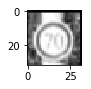

In [7]:
# Make an instance of ImageDataGenerator
My_ImageGenerator = ImageDataGenerator()
# generate random rotated images - within [-30,30] degree range
X_Rot, Y_Rot = My_ImageGenerator.random_rotate(x_train,y_train, 30)
# generate random translated images [-10,10] pixels range
X_Tra, Y_Tra = My_ImageGenerator.random_translate(x_train,y_train, 10)
# Append to Train-data Sets
X_train = np.append(x_train, X_Rot, axis=0)
X_train = np.append(X_train, X_Tra, axis=0)
y_train = np.append(y_train, [Y_Rot, Y_Tra])

# grascale data
X_train = My_ImageGenerator.grayscale(X_train).astype('float')
X_valid = My_ImageGenerator.grayscale(X_valid).astype('float')
X_test = My_ImageGenerator.grayscale(X_test).astype('float')

# randomaly show a grayscale image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

In [8]:
# normalize data
X_train = My_ImageGenerator.normalize(X_train)
X_valid = My_ImageGenerator.normalize(X_valid)
X_test = My_ImageGenerator.normalize(X_test)

# Shuffle data
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

### Model Architecture

The model architecture is based on the LeNet model architecture. 
I added dropout layers before each fully connected layer in order to prevent overfitting. 

<figure>
 <img src="LeNet5_CNN.png" width="880" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 

In [9]:
def LeNet(x):
    mu = 0
    sigma = 0.1
    
    # convolutional layer 1. input = 32x32x1. output = 28x28x6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    
    # activation with relu
    conv1 = tf.nn.relu(conv1)
    
    # max pooling. input = 28x28x6. output = 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # convolutional layer 2. input = 14x14x6. output = 10x10x16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    
    # activation with relu
    conv2 = tf.nn.relu(conv2)
    
    # max pooling. input = 10x10x16. output = 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # flatten. input = 10x10x6. output = 400
    fc0   = flatten(conv2)
    
    # layer 3: fully connected layer. input = 400. output = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # activation with relu
    fc1 = tf.nn.relu(fc1)
    
    # drop out to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_probability)
    
    # layer 4: fully connected layer. input = 120. output = 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # activation with relu
    fc2 = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, keep_probability)

    # layer 5: fully connected layer. input = 84. output = 43
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Hyperparameters Optimization

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

I used an iterative approach for the optimization of validation accuracy:

1. As an initial model architecture the original LeNet model from the course was chosen. In order to tailor the architecture for the traffic sign classifier usecase I adapted the input so that it accepts the colow images from the training set with shape (32,32,3) and I modified the number of outputs so that it fits to the 43 unique labels in the training set. The training accuracy was 83.5% and my test traffic sign “pedestrians” was not correctly classified. *(used hyper parameters: EPOCHS=10, BATCH_SIZE=128, learning_rate = 0,001, mu = 0, sigma = 0.1)*

2. After adding the grayscaling preprocessing the **validation accuracy increased to 91%** (hyperparameter unmodified)
The additional normalization of the training and validation data resulted in a minor increase of **validation accuracy: 91.8% **(hyperparameter unmodified)

3. Adding dropout after the two fully connected layer has improved the Validation accuracy to 93%

4. I decided to reduce the learning rate and increase of epochs. **validation accuracy = 96,1%** (EPOCHS = 150, BATCH_SIZE = 128, rate = 0,0006, mu = 0, sigma = 0.1)

In [10]:
EPOCHS = 150
BATCH_SIZE = 128
learning_rate = 0.0006

### Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="x")
y = tf.placeholder(tf.int32, (None), name="labels")
keep_probability = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, n_classes)

### Training Pipeline

In [13]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_probability: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

IntProgress(value=0, max=150)

Training...

Model saved
EPOCH 150 ...
Validation Accuracy = 0.963
Test Accuracy = 0.938


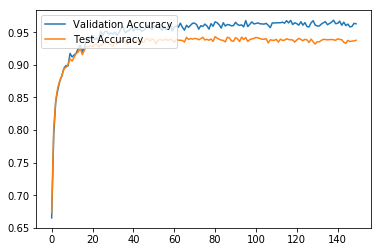

In [15]:
from ipywidgets import IntProgress
from IPython.display import display

# saver
saver = tf.train.Saver()

# variables for progress-bar
f = IntProgress(min=0, max=EPOCHS) # instantiate the bar
display(f) # display the bar

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = X_train.shape[0]
    print("Training...")
    print()
    validation_accuracies = []
    test_accuracies = []
    
    for i in range(EPOCHS):
        f.value = i # signal to increment the progress bar
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_probability: 0.5})

        validation_accuracy = evaluate(X_valid, y_valid)
        test_accuracy = evaluate(X_test, y_test)
        validation_accuracies.append(validation_accuracy)
        test_accuracies.append(test_accuracy)

    saver.save(sess, './lenet.ckpt')
    print("Model saved")
    
    # show learning statistics
    print("EPOCH {} ...".format(i+1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    plt.plot(range(EPOCHS),validation_accuracies)
    plt.plot(range(EPOCHS),test_accuracies)
    plt.legend(['Validation Accuracy', 'Test Accuracy'], loc='upper left')
    plt.show

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

i used 5-images 

### Load and Output the Images

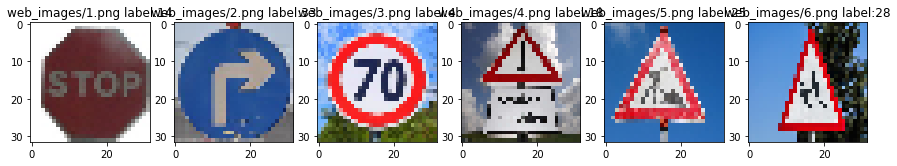

In [52]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2
import matplotlib.image as mpimg
web_images = os.listdir("web_images/")
test_labels = np.array([14,33,4,18,25,28])

# Show the images, add to a list to process for classifying
test_images_raw = []
i = 0
plt.figure(figsize=(15, 30))
for img in web_images:
    img = 'web_images/' + img
    plt.subplot(1, 6, i+1)
    plt.title(img + " label:" + str(test_labels[i]))
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32,32))
    plt.imshow(image)
    test_images_raw.append(image)
    i = i + 1
plt.show()

# grascale data
test_images_gray = My_ImageGenerator.grayscale(test_images_raw).astype('float')
# normalize
test_images = My_ImageGenerator.normalize(test_images_gray).astype('float')

### Predict the Sign Type for Each Image

In [56]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
test_accuracy = 0.0
predictions = []
predictionIndicies = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenet.ckpt')
    softmax = tf.nn.softmax(logits)
    # apply softmax with maximum 5-Probabilites
    pred = tf.nn.top_k(softmax, 5)
    test_accuracy = evaluate(test_images, test_labels)
    result = sess.run(pred, feed_dict={x: test_images, keep_probability: 1.0})
    predictions  = result.values
    prediction_Indicies  = result.indices


INFO:tensorflow:Restoring parameters from ./lenet.ckpt


In [55]:
prediction=tf.argmax(logits,1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(prediction, feed_dict={x: test_images, keep_probability: 1.0})
    #visualizeImages(my_X_test, predictions)
    print (predictions)

INFO:tensorflow:Restoring parameters from .\lenet.ckpt
[14 33  4  8 25 28]


### Analyze Performance

In [54]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#print("Test Accuracy = {:.3f}".format(test_accuracy))
print("Test Accuracy = {0:.0%}".format(test_accuracy))

Test Accuracy = 83%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, i printed out the model's softmax probabilities to show the **certainty** of the model's predictions with a limitation of the top 5 probabilities for each image - using [`tf.nn.top_k`]

In [57]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print ("predictions=",predictions)
print ("prediction_Indicies=",prediction_Indicies)
print ("test_accuracy=",test_accuracy)

predictions= [[9.39819813e-01 5.98139130e-02 1.89692262e-04 1.42076591e-04
  3.45599910e-05]
 [9.93675411e-01 5.19704865e-03 7.48918275e-04 2.31663231e-04
  5.17812987e-05]
 [1.00000000e+00 1.94419161e-19 1.08876209e-22 1.56284764e-24
  3.58295704e-29]
 [5.62137127e-01 2.47013330e-01 7.93333054e-02 4.97727357e-02
  3.50560546e-02]
 [9.99995351e-01 4.27816212e-06 3.82426094e-07 6.82602249e-13
  4.52173618e-13]
 [9.94937181e-01 5.03949495e-03 2.32161983e-05 1.07298256e-07
  5.85730531e-09]]
prediction_Indicies= [[14 33  3 13 39]
 [33 35 11 14  3]
 [ 4  8  1 15 14]
 [ 8  4  2  1  0]
 [25 29 22 18 20]
 [28 29 27 31 18]]
test_accuracy= 0.8333333134651184
